In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, DBSCAN

In [19]:
x, y =make_moons(n_samples=300, noise=0.05, random_state=1)
x_scale = StandardScaler().fit_transform(x)

moons = pd.DataFrame(x_scale, columns=["x01", "x02"])
moons["target"] = y
moons

,x01,x02,target
0,-0.238586,-0.865015,1
1,-1.545740,0.613124,0
2,-0.280542,-0.762495,1
3,0.378192,-1.432836,1
4,-1.285611,0.899126,0
...,...,...,...
295,0.041893,-1.270396,1
296,1.250384,-1.187579,1
297,-0.545947,1.566008,0
298,0.781112,-1.365947,1


<Axes: xlabel='x01', ylabel='x02'>

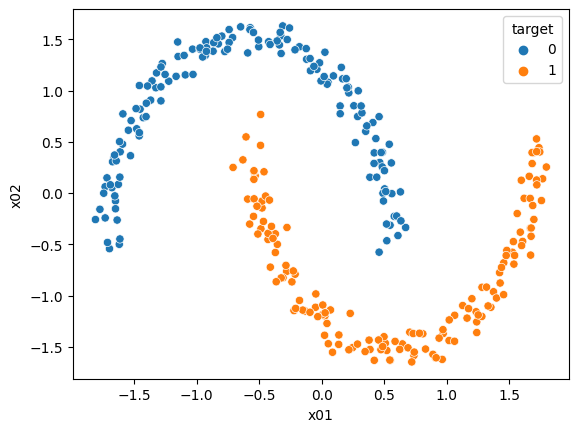

In [20]:
sns.scatterplot(data=moons, x="x01", y="x02", hue="target")
# make_moons 

In [21]:
# k-means   
# 간단한 데이터셋에서는 잘 나오는데 x가 복잡해질 수록 잘 못나눈다는 단점이 있다.
# 단순한 것에서는 좋음
model01 = KMeans(n_clusters=2, n_init="auto", random_state=1)
model01.fit(x)
moons["k-means"] = model01.predict(x)

In [22]:
# 병합군집
model02 = AgglomerativeClustering(n_clusters=2)
moons["agglomerative"] = model02.fit_predict(x)

In [23]:
# mean-shift
from sklearn.cluster import estimate_bandwidth

In [24]:
# estimate_candwidth : 최적의 대역폭 찾기
bandwidth = round(estimate_bandwidth(x), 2)
model03 = MeanShift(bandwidth=bandwidth)
moons["meanshift"] = model03.fit(x).labels_

In [25]:
# dbscan
model04=DBSCAN(eps=0.25)
moons["dbscan"] = model01.fit_predict(x)

In [26]:
moons.columns

Index(['x01', 'x02', 'target', 'k-means', 'agglomerative', 'meanshift',
       'dbscan'],
      dtype='object')

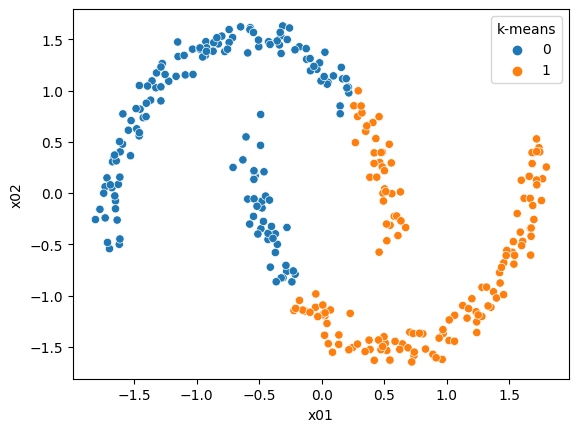

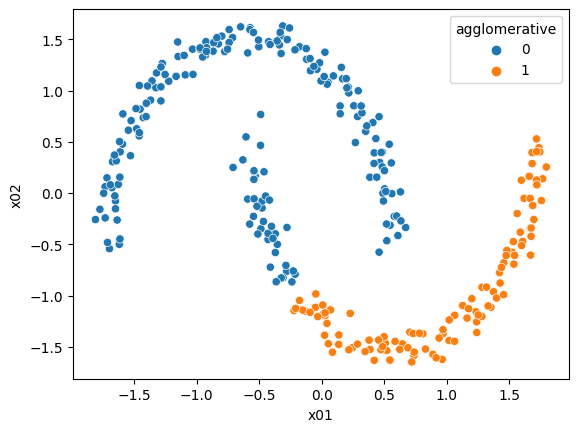

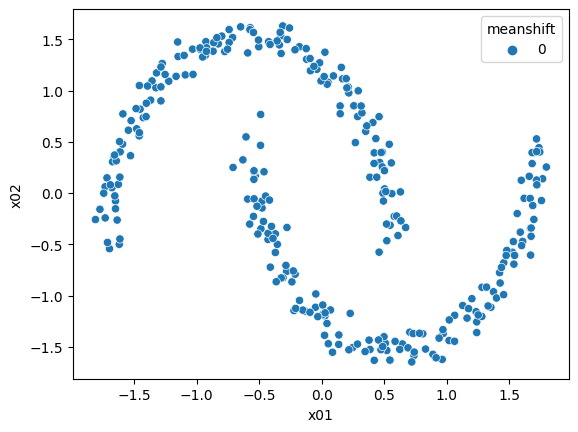

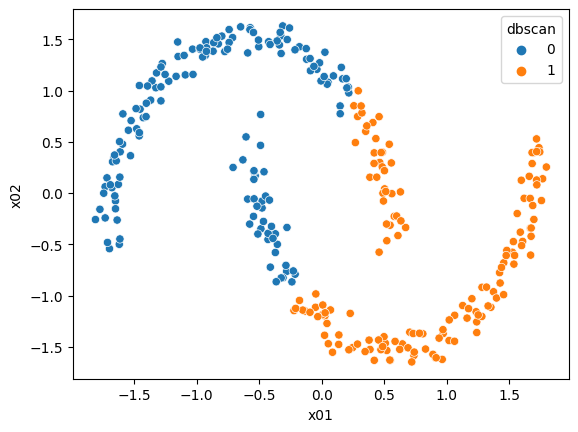

In [27]:
for model in moons.iloc[:, 3:]:
    sns.scatterplot(data=moons, x="x01", y="x02", hue=model)
    plt.show()

In [45]:
# 군집에 대한 평가
from sklearn.metrics import accuracy_score, normalized_mutual_info_score

from sklearn.metrics.cluster import adjusted_rand_score, silhouette_score

답을 알 때!
- ARI(Adjusted Rand Index) : 0(무작위) ~ 1(최적)
- NMI(Normalized Mutual Information) : 0 (상관없음) ~ 1(완벽한 상관관계) -> 정규화된 평균값 계산

답을 모를 때!
- silhuette score : 군집의 밀집도 계산

In [46]:
metrics_df = pd.DataFrame(moons.iloc[:, 3:].columns, columns=["model"])
metrics_df

,model
0,k-means
1,agglomerative
2,meanshift
3,dbscan


In [47]:
acc = list()
ari = list()
nmi = list()
silhouette = list()

for predict in moons.iloc[:, 3:]:
    acc.append(accuracy_score(moons["target"], moons[predict]))
    ari.append(adjusted_rand_score(moons["target"], moons[predict]))
    nmi.append(normalized_mutual_info_score(moons["target"], moons[predict]))
    
    try:
        silhouette.append(silhouette_score(moons[["x01", "x02"]], moons[[predict]]))
        
    except:
            # 실루엣 계수는 2개 이상으로 클러스터링 되야 함!
            # meanshift가 1개 밖에 안묶여서 에러남!
            silhouette.append(0)
            
metrics_df["accuracy"] = acc
metrics_df["ari"] = ari
metrics_df["nmi"] = nmi
metrics_df["silhuette"] = silhouette

C:\Program Files (x86)\ANACONDA3\envs\dsde04\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files (x86)\ANACONDA3\envs\dsde04\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files (x86)\ANACONDA3\envs\dsde04\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files (x86)\ANACONDA3\envs\dsde04\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was 

In [48]:
metrics_df

,model,accuracy,ari,nmi,silhuette
0,k-means,0.746667,0.240839,0.183534,0.449856
1,agglomerative,0.870000,0.546185,0.550886,0.453029
2,meanshift,0.500000,0.000000,0.000000,0.000000
3,dbscan,0.746667,0.240839,0.183534,0.449856


In [ ]:
# 군집으로 볼 때 accuracy 정확도는 볼 필요가 없다.
# ari 0이면 무작위 1이면 최적의 값
# 